# Setings

In [1]:

from bs4 import BeautifulSoup
import pandas as pd
from selenium import webdriver
import time
import requests
from requests_html import HTML
from urllib.parse import urlparse
import os
import pandas as pd
from selenium import webdriver
import time
import requests
from urllib.parse import urlparse
import os
import matplotlib.pyplot as plt
import seaborn as sns

## Importar as bibliotecas regex e RegexpTokenizer from nltk.tokenize

import re
import nltk

from nltk.tokenize import RegexpTokenizer

In [2]:
# Setting work directories and files: getting current directory
cwd = os.getcwd()
print(cwd)

/Users/dumoura/Dev/PDev/CGScholar/Robot_cit/Notebook


In [3]:
# Setting work directories and files: crating work directories
# Base_dir

BASE_DIR = os.path.dirname(cwd) # base directory

TABLES_DIR = os.path.join(BASE_DIR, "tables")
META_DIR = os.path.join(BASE_DIR, "metada") 

# Make_dirs
os.makedirs(TABLES_DIR, exist_ok=True)
os.makedirs(META_DIR, exist_ok=True)

In [4]:
table_name = input(f"Select a csv document:\n{os.listdir(TABLES_DIR)}\n\n")

Select a csv document:
['Works_Experience_Graded.csv', 'intro2scores.csv', '.DS_Store', 'WorksAuthorIntroRef.csv', 'Works_40_50_AuthorIntroRef.csv', 'EPOL481.csv', 'intro2scores.xls', '.ipynb_checkpoints']

Works_Experience_Graded.csv


In [5]:
df = pd.read_csv(f"{TABLES_DIR}/{table_name}") #ADD doctitle.csv - doc with the works url
df.columns

Index(['author', 'Experience', 'Experience_Rodrigo', 'Experience_Shang',
       'Experience_Jen', 'Peer Reviewers'],
      dtype='object')

# A. Exploring some features #

In [125]:
## look the first row 
# df.head(1)

In [6]:
## n of rows and columns
# df.shape

In [7]:
# # general table descriptions
# df.describe

In [8]:
# the standard deviation for each evaluation
df.std()

Experience_Rodrigo    1.268070
Experience_Shang      1.187352
Experience_Jen        1.208301
Peer Reviewers        0.701525
dtype: float64

In [10]:
# n of grades [from 0 to 4] given by TA 

n_grade_Rodrigo = df["Experience_Rodrigo"].value_counts()
n_grade_Shang = df["Experience_Shang"].value_counts()
n_grade_Jen = df["Experience_Jen"].value_counts()

print(n_grade_Rodrigo, "\n")
# print(n_grade_Shang, "\n");
# print(n_grade_Jen, "\n");

4.0    15
3.0    12
1.0     8
2.0     6
0.5     3
2.5     2
0.0     1
Name: Experience_Rodrigo, dtype: int64 



In [12]:
# porcentage of grades given by TAs (n%)

val = (df["Peer Reviewers"].value_counts(max, sort=False))*100
print(f"{val}")

1     6.382979
2    14.893617
3    68.085106
4    10.638298
Name: Peer Reviewers, dtype: float64


# B. Exploring -  "expiriences" row

In [13]:
# row 1 to 4
print(df["Experience"][:4])

0    The social context of education aims to identi...
1    Formal and Informal learning are an integral p...
2    The education sector has historically been a l...
3    As a second/third grade teacher, I have recent...
Name: Experience, dtype: object


In [14]:
#preprocessing - lower_cases
lower_cases = []

for i in df["Experience"]:
    lower_cases.append([i.lower()])

print(lower_cases[0])

['the social context of education aims to identify modern issues in education through philosophical, political, and sociological lenses (smrekar & bentley, 2017). studies in this field revolve around the relationship between education and society, including topics like equity, social policy, opportunity, and access to education (smrekar & bentley, 2017). as stated by kalantzis and cope (2000), the anxieties of parents has become a recent topic of discussion as a contemporary social context of education. within this topic, the trend of parents electing to home school their children has emerged (kalantzis & cope, 2017). it is estimated that 1.7 million children, or 3.3% of school aged children are enrolled in homeschooling educational programs (nces, 2016). although homeschooling prevalence has increased in recent years, it’s educational and social outcomes remain unclear. percent of homeschooled students since 1999. retrieved from https://nces.ed.gov/blogs/nces/post/a-fresh-look-at-home

In [15]:
# tokenizing

ttk = []
for i in lower_cases:
    cc1 = str(i[0])
    tokkens = re.findall('\w+', cc1)
    ttk.append(tokkens)
    
print(ttk[0])

['the', 'social', 'context', 'of', 'education', 'aims', 'to', 'identify', 'modern', 'issues', 'in', 'education', 'through', 'philosophical', 'political', 'and', 'sociological', 'lenses', 'smrekar', 'bentley', '2017', 'studies', 'in', 'this', 'field', 'revolve', 'around', 'the', 'relationship', 'between', 'education', 'and', 'society', 'including', 'topics', 'like', 'equity', 'social', 'policy', 'opportunity', 'and', 'access', 'to', 'education', 'smrekar', 'bentley', '2017', 'as', 'stated', 'by', 'kalantzis', 'and', 'cope', '2000', 'the', 'anxieties', 'of', 'parents', 'has', 'become', 'a', 'recent', 'topic', 'of', 'discussion', 'as', 'a', 'contemporary', 'social', 'context', 'of', 'education', 'within', 'this', 'topic', 'the', 'trend', 'of', 'parents', 'electing', 'to', 'home', 'school', 'their', 'children', 'has', 'emerged', 'kalantzis', 'cope', '2017', 'it', 'is', 'estimated', 'that', '1', '7', 'million', 'children', 'or', '3', '3', 'of', 'school', 'aged', 'children', 'are', 'enrolled

In [19]:
#stopwords
sw = nltk.corpus.stopwords.words('english')
print (sw)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [20]:
# Initialize a new list with no stopwords
words_ns = []

for word in ttk:
    if word not in sw:
        words_ns.append(word)

print(words_ns[0])

['the', 'social', 'context', 'of', 'education', 'aims', 'to', 'identify', 'modern', 'issues', 'in', 'education', 'through', 'philosophical', 'political', 'and', 'sociological', 'lenses', 'smrekar', 'bentley', '2017', 'studies', 'in', 'this', 'field', 'revolve', 'around', 'the', 'relationship', 'between', 'education', 'and', 'society', 'including', 'topics', 'like', 'equity', 'social', 'policy', 'opportunity', 'and', 'access', 'to', 'education', 'smrekar', 'bentley', '2017', 'as', 'stated', 'by', 'kalantzis', 'and', 'cope', '2000', 'the', 'anxieties', 'of', 'parents', 'has', 'become', 'a', 'recent', 'topic', 'of', 'discussion', 'as', 'a', 'contemporary', 'social', 'context', 'of', 'education', 'within', 'this', 'topic', 'the', 'trend', 'of', 'parents', 'electing', 'to', 'home', 'school', 'their', 'children', 'has', 'emerged', 'kalantzis', 'cope', '2017', 'it', 'is', 'estimated', 'that', '1', '7', 'million', 'children', 'or', '3', '3', 'of', 'school', 'aged', 'children', 'are', 'enrolled

In [21]:
# to viz

%matplotlib inline
sns.set()

# Crear um plot de frequencia para analizar nossa lista words_ns - (words_ns[1])

freqdist1 = nltk.FreqDist(words_ns[0])

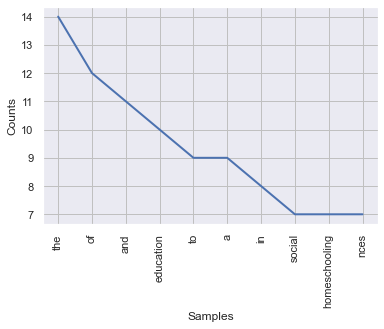

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [22]:

# plotar as 25 palavras mais usadas

freqdist1.plot(10)

In [23]:
freqdist1["education"]

10

In [24]:
from collections import Counter

In [25]:
# n_words = Counter(words_ns[1])
# n_words

In [26]:
f1 = int(freqdist1.freq("education")*100)
print(f" the percentage of times that 'education' appears: {f1}%")

 the percentage of times that 'education' appears: 3%


In [27]:
len(words_ns[1])

308

In [28]:
## Importar as bibliotecas regex e RegexpTokenizer from nltk.tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.text import Text
from nltk import FreqDist

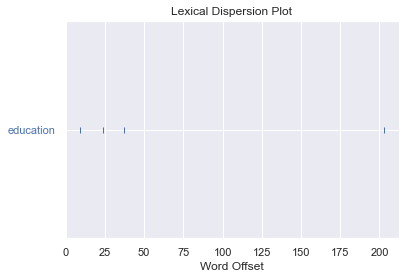

In [29]:
p = Text(words_ns)

concordance = Text(words_ns[1])
concordance.dispersion_plot(["education"])

In [30]:
# The context in which the word appears

concordance.concordance("education")

Displaying 4 of 4 matches:
l learning are an integral part of education professor cope 2016 mentioned how 
ues even after the start of formal education and can happen everywhere anytime 
someone who has worked in language education for over a decade i have observed 
ing in addition to the traditional education that happens in the institution th


In [31]:
# words related - beford

concordance.findall("(<.*>) <education>")

of; formal; language; traditional


In [32]:
# words related - after

concordance.findall("<education> (<.*>)") #{,4}

professor; and; for; that


# Exploring - NLP

## Text pre-processing

- Tokenization and Lemmatization
-- lowercase
-- base-form

In [33]:
#Tokenization and Lemmatization EXEMPLE
# python3 -m spacy download en_core_web_sm

import spacy
from spacy.lang.en.examples import sentences 

In [34]:
#load en_core_we model

nlp = spacy.load("en_core_web_sm")

In [37]:
# Function to preprocess text

def preprocess(text):
  	# Create Doc object
    doc = nlp(text, disable=['ner', 'parser'])
# Generate lemmas
    lemmas = [token.lemma_ for token in doc]
# Remove stopwords and non-alphabetic characters
    a_lemmas = [lemma for lemma in lemmas 
            if lemma.isalpha()]
    
    return ' '.join(a_lemmas)
  
# Apply preprocess to ted['transcript']

df = df['Experience'].apply(preprocess)
print(df)


0     the social context of education aim to identif...
1     formal and informal learning be an integral pa...
2     the education sector have historically be a li...
3     as a second third grade teacher I have recentl...
4     image eSchool News teacher share formative ass...
5     as both a full time student and an educator in...
6     I consider myself an active video gamer one of...
7     what a year that be what many of we say about ...
8     figure unicef when accept a position as an ear...
9     researcher and educator focus much of their ef...
10    since the inception of modern education in the...
11    Grafted Integrated Health Network become traum...
12    learning be no long an activity that only occu...
13    traditionally school be a place for learn acad...
14    Social Emotional Learning or SEL have be a buz...
15    my background be in Engineering Education and ...
16    the way I learn when I attend school be the sa...
17    the past three school year the elementary 

### Part-of-speech tagging

In [38]:
# POS Exemple 

#load en_core_we model
nlp = spacy.load("en_core_web_sm")

#exemple

string_5 = df[5]
doc_5 = nlp(string_5)
pos_5 = [(token.text, token.pos_) for token in doc_5]

# print(pos_5)

In [39]:
# Returns number of proper nouns
nlp = spacy.load('en_core_web_sm')

# Returns number of proper nouns
def proper_nouns(text, model=nlp):
  # Create doc object
    doc = model(text)
    # Generate list of POS tags
    pos = [token.pos_ for token in doc]
    
    # Return number of proper nouns
    return pos.count('PRON')

# Returns number of nouns
def nouns(text, model=nlp):
    # Create doc object
    doc = model(text)
    # Generate list of POS tags
    pos = [token.pos_ for token in doc]
    
    # Return number of other nouns
    return pos.count("NOUN")

# Returns number of verb
def verb(text, model=nlp):
    # Create doc object
    doc = model(text)
    # Generate list of POS tags
    pos = [token.pos_ for token in doc]
    # Return number of other nouns
    return pos.count("VERB")

# Returns number of verb
def adjective(text, model=nlp):
    # Create doc object
    doc = model(text)
    # Generate list of POS tags
    pos = [token.pos_ for token in doc]
    # Return number of other nouns
    return pos.count("ADJ")

# Returns number of verb
def adverb(text, model=nlp):
    # Create doc object
    doc = model(text)
    # Generate list of POS tags
    pos = [token.pos_ for token in doc]
    # Return number of other nouns
    return pos.count('ADV')

# Returns number of verb
def ponctuation(text, model=nlp):
    # Create doc object
    doc = model(text)
    # Generate list of POS tags
    pos = [token.pos_ for token in doc]
    # Return number of other nouns
    return pos.count('PUNCT')

print("nouns =",nouns(string_5, nlp))
print("proper nouns =",proper_nouns(string_5, nlp))
print("adjective =",adjective(string_5, nlp))
print("verb =",verb(string_5, nlp))
print("adverb =",adverb(string_5, nlp))
# print("ponctuation =",ponctuation(string_5, nlp))

nouns = 72
proper nouns = 7
adjective = 21
verb = 32
adverb = 8


### Named entity recognition (NER)

Fonte: https://spacy.io/usage/linguistic-features

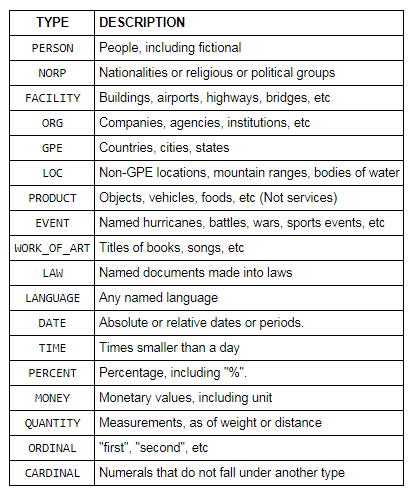

In [40]:
#Exemple - row 6

string_5 = df[5]

nlp = spacy.load("en_core_web_sm")
doc_5 = nlp(string_5)

ne = [(ent.text, ent.label_) for ent in doc_5.ents]
print(ne)

[('two', 'CARDINAL'), ('New Learning', 'NORP'), ('eight', 'CARDINAL'), ('Kalantzis', 'ORG'), ('cultivate century', 'DATE'), ('today', 'DATE'), ('today', 'DATE'), ('CBE', 'ORG'), ('CBE', 'ORG')]


In [41]:
def find_persons(text):
  # Create Doc object
  doc = nlp(text)
  # Identify the persons
  persons = [ent.text for ent in doc.ents if ent.label_ == 'PERSON']
  # Return persons
  return persons

def find_organizations(text):
  # Create Doc object
  doc = nlp(text)
  # Identify the persons
  organizations = [ent.text for ent in doc.ents if ent.label_ == 'ORG']
  # Return persons
  return organizations

def find_workofarts(text):
  # Create Doc object
  doc = nlp(text)
  # Identify the persons
  organizations = [ent.text for ent in doc.ents if ent.label_ == 'WORK_OF_ART']
  # Return persons
  return organizations

def find_dates(text):
  # Create Doc object
  doc = nlp(text)
  # Identify the persons
  organizations = [ent.text for ent in doc.ents if ent.label_ == 'DATE']
  # Return persons
  return organizations

def find_norps(text):
  # Create Doc object
  doc = nlp(text)
  # Identify the persons
  organizations = [ent.text for ent in doc.ents if ent.label_ == 'NORP']
  # Return persons
  return organizations

def find_laws(text):
  # Create Doc object
  doc = nlp(text)
  # Identify the persons
  organizations = [ent.text for ent in doc.ents if ent.label_ == 'LAW']
  # Return persons
  return organizations

def find_languages(text):
  # Create Doc object
  doc = nlp(text)
  # Identify the persons
  organizations = [ent.text for ent in doc.ents if ent.label_ == 'LANGUAGE']
  # Return persons
  return organizations

def find_gpes(text):
  # Create Doc object
  doc = nlp(text)
  # Identify the persons
  organizations = [ent.text for ent in doc.ents if ent.label_ == 'GPE']
  # Return persons
  return organizations

In [284]:
strings = str(df[6])

print("authors cit: ", find_persons(strings), "\n")
print("org cit: ", find_organizations(strings), "\n")
print("works cit: ", find_workofarts(strings), "\n")
# print("norps cit: ", find_norps(strings), "\n")
# print("gpes cit: ", find_gpes(strings),"\n")
# print("languages cit: ", find_languages(strings), "\n")
# print("laws cit: ", find_laws(strings), "\n")

authors cit:  ['Newzoo', 'Fulya Eyupoglu', 'Nietfield'] 

org cit:  ['Entertainment Software Association', 'Entertainment Software Association', 'GBL', 'GBL'] 

works cit:  [] 



### Number of words - Exemplos

In [42]:
#Function that return number of words in string

def word_count(string):
    words = string.split()
    return len(words)

# #Create num_words feature in df

# df["num_words "] = df.apply(word_count)

def avg_word_length(x):
    words = x.split()
    word_length = [len(word) for word in words]
    avg_word_length = sum(word_length)/len(words)
    return(avg_word_length)

# #Create avg_word_length feature in df

# df["avg_word_length"] = df.apply(doc_density)


In [43]:
num_char1 = len(df)
print(df[0:])

0     the social context of education aim to identif...
1     formal and informal learning be an integral pa...
2     the education sector have historically be a li...
3     as a second third grade teacher I have recentl...
4     image eSchool News teacher share formative ass...
5     as both a full time student and an educator in...
6     I consider myself an active video gamer one of...
7     what a year that be what many of we say about ...
8     figure unicef when accept a position as an ear...
9     researcher and educator focus much of their ef...
10    since the inception of modern education in the...
11    Grafted Integrated Health Network become traum...
12    learning be no long an activity that only occu...
13    traditionally school be a place for learn acad...
14    Social Emotional Learning or SEL have be a buz...
15    my background be in Engineering Education and ...
16    the way I learn when I attend school be the sa...
17    the past three school year the elementary 

In [46]:
lista_char_1 = []

for i in df:
    listx = i.split()
    lista_char_1.append(listx)

In [47]:
# print(lista_char_1)

In [48]:
n_chrt = []

for i in lista_char_1:
    n_chrt.append(len(i))

print(n_chrt)

[277, 306, 255, 321, 116, 224, 198, 149, 358, 289, 248, 97, 167, 332, 278, 325, 153, 232, 552, 277, 303, 228, 316, 338, 111, 411, 207, 599, 269, 95, 399, 112, 232, 315, 52, 1505, 151, 371, 313, 386, 320, 87, 313, 103, 307, 377, 390]


In [49]:
#Readability tests


df['crit_n_txt'] = n_chrt


In [51]:
# df

### Number of words - Caso

In [54]:
table_name = input(f"Select a csv document:\n{os.listdir(TABLES_DIR)}\n\n")

Select a csv document:
['Works_Experience_Graded.csv', 'intro2scores.csv', '.DS_Store', 'WorksAuthorIntroRef.csv', 'Works_40_50_AuthorIntroRef.csv', 'EPOL481.csv', 'intro2scores.xls', '.ipynb_checkpoints']

Works_Experience_Graded.csv


In [55]:
df = pd.read_csv(f"{TABLES_DIR}/{table_name}") #ADD doctitle.csv - doc with the works url
df.columns

Index(['author', 'Experience', 'Experience_Rodrigo', 'Experience_Shang',
       'Experience_Jen', 'Peer Reviewers'],
      dtype='object')

In [56]:
# df['Experience_2_str'] = df['Experience'].apply(str)

intro_length = []

for i in df['Experience']:
    listx = i.split()
    intro_length.append(listx)

# intro_length

n_chrt = []

for i in intro_length:
    n_chrt.append(len(i))

# #the length of witch text
print(n_chrt)

[291, 306, 255, 316, 117, 233, 210, 149, 358, 290, 254, 93, 167, 331, 287, 328, 152, 238, 569, 277, 310, 228, 345, 345, 110, 421, 223, 596, 273, 98, 402, 113, 230, 314, 48, 1550, 149, 375, 318, 395, 316, 87, 312, 104, 315, 379, 401]


In [57]:
df['length_intro'] = n_chrt

In [58]:
df.head(1)

,author,Experience,Experience_Rodrigo,Experience_Shang,Experience_Jen,Peer Reviewers,length_intro
0,Aaron Gonzales Aaron,The social context of education aims to identi...,1.0,1.0,2.0,3,291


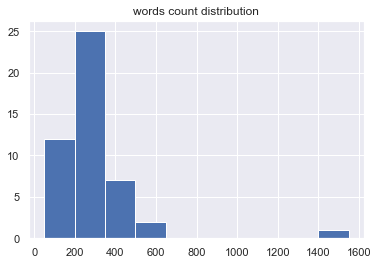

In [59]:
# display distribution

df['length_intro'].hist()
plt.title('words count distribution')
plt.show();

In [60]:
print("mean = ", df['length_intro'].mean())
print("median = ", df['length_intro'].median())
print("max = ", df['length_intro'].max())
print("min = ", df['length_intro'].min())

mean =  297.40425531914894
median =  290.0
max =  1550
min =  48


In [61]:
#Max
print(df["author"][35])
print(df["Peer Reviewers"][35])
print(df["length_intro"][35], "\n")
print(df["Experience"][35])

Natalie Andreas
3
1550 

In a world with seemingly endless distractions, from digital devices to streaming entertainment, to virtual learning quickly evolving into “the new normal,” evaluating how one thinks and learns proves to be an essential exercise. Heritage scholarship proved that student learning can be enhanced by “becoming aware” of their own thinking while completing exercises such as reading, writing, and solving problems (Paris & Winograd 1990). Ample evidence exists to postulate that “metacognitive activity” positively impacts generalized student learning (Perkins & Salomon 1989). The modern classroom currently exists in multiple “worlds:” the physical space, where students sit at desks or tables, and the virtual space, where students and teachers connect and exchange ideas through screens and content management systems. Although many educators and learners voice discomfort with virtual environments, some scholars claim that digital learning is the future. In fact, online 

In [62]:
#Min
print(df["author"][34])
print(df["Peer Reviewers"][34])
print(df["length_intro"][34], "\n")
print(df["Experience"][34])

Monique Tanon
3
48 

Hello! I'm sorry that you're receiveing this late review request. I had some minor health problems that I'm recovering from. I know you're very busy with school and other commitments right now, but I just wanted to say thank you for giving me feedback at such late notice. 


In [63]:
#Median

print(df["author"][9])
print(df["Peer Reviewers"][9])
print(df["length_intro"][9], "\n")
print(df["Experience"][9])

Beth Rock
3
290 

Researchers and educators focus much of their efforts on understanding the various strategies and methods to increase the effectiveness of the student learning environment. As schools move toward incorporating technology into every aspect of the curriculum as well as teacher requirements, methods for effectively implementing digital applications into the classroom have become a cornerstone of educational community discussions. The current generation has grown up in a digital age surrounded by technology. As teachers negotiate best practices in a 21st century classroom, educators are tasked with how to utilize technology in an effort to capitalize on student motivation and engagement. As a school improvement coordinator, part of my job is to track the technology that teachers are using to supplement their curriculum. Through teacher surveys and team meetings, I partner with teachers to examine the tools that they are using. Budget decisions drive many of these conversa

### Readability tests

font: https://pypi.org/project/textatistic/

font: https://www.researchgate.net/publication/262209424_Do_NLP_and_machine_learning_improve_traditional_readability_formulas

**Over view of readability tests**
- Determine readability of an English passage
- Scaleranging from primary school up to college graduate level 
- A mathematical formula utilizing word, syllable and sentence count 
- Used in fake news and opinion spam detection

**Readability text examples**
- ***Flesch reading ease*** https://en.wikipedia.org/wiki/Flesch%E2%80%93Kincaid_readability_tests 

> One of the oldest and most widely used tests

> Dependent on two factors - Averagee sentence lenght/ Average number of syllables

> Higherthescore,greaterthereadability

- ***Gunning fog index*** 

> 1954

> Dependent on - Averagee sentence lenght Greater the percentage of complex words, harder the text is to read

> Higher the index, lesser the readability


- Simple Measure of Gobbledygook(SMOG)
- Dale-Challscore



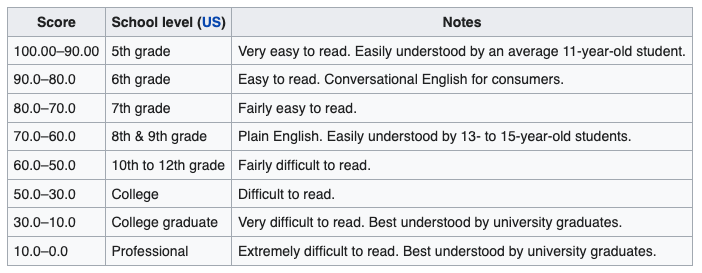

In [559]:
score = 80

if score <= 50:
    print("Dificult to read")
elif score < 60:
    print("Faire dificult to read")
elif score > 60 and score < 80:
    print("Easy to read")
elif score >= 80:
    print("Very easy to read")
    

Very easy to read


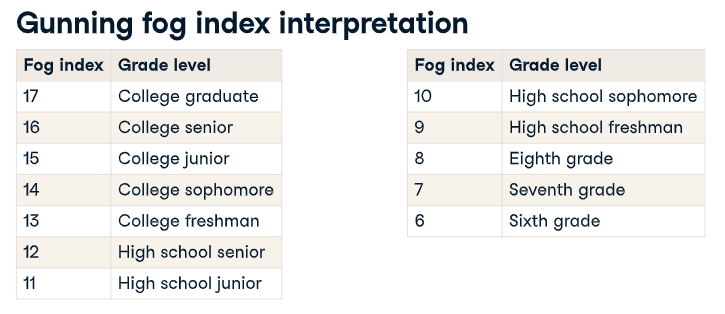

In [474]:
table_name = input(f"Select a csv document:\n{os.listdir(TABLES_DIR)}\n\n")

Select a csv document:
['Works_Experience_Graded.csv', '.DS_Store', 'WorksAuthorIntroRef.csv', 'Works_40_50_AuthorIntroRef.csv', 'EPOL481.csv', '.ipynb_checkpoints']

Works_Experience_Graded.csv


In [475]:
df = pd.read_csv(f"{TABLES_DIR}/{table_name}") #ADD doctitle.csv - doc with the works url
df.columns

Index(['author', 'Experience', 'Experience_Rodrigo', 'Experience_Shang',
       'Experience_Jen', 'Peer Reviewers'],
      dtype='object')

In [64]:
from textatistic import Textatistic

In [65]:
readability_scores_geral =  Textatistic(str(df['Experience'])).scores

In [66]:
print('readability_scores_geral  ' , readability_scores_geral['flesch_score'])
print('readability_scores_geral  ' , readability_scores_geral['gunningfog_score'])

readability_scores_geral   86.59570523027465
readability_scores_geral   5.024709218567551


In [68]:
# df.head(12)

In [79]:
# Create a Textatistic Object
readability_scores_35 = Textatistic(str(df['Experience'][35])).scores
readability_scores_36 = Textatistic(str(df['Experience'][36])).scores

In [80]:
print('flesch_score_35 = ' , readability_scores_35['flesch_score'])
print('gunningfog_score_35 = ', readability_scores_35['gunningfog_score'])

flesch_score_35 =  41.02339690721652
gunningfog_score_35 =  16.085066273932252


In [81]:
print('flesch_score_36 = ' , readability_scores_36['flesch_score'])
print('gunningfog_score_36 = ', readability_scores_36['gunningfog_score'])

flesch_score_36 =  41.71842384105963
gunningfog_score_36 =  18.17271523178808


In [82]:
introExperience = []

for intro_ in df["Experience"]:
    strings = str(intro_)
    introExperience.append(strings)

intro_GunningFog_scores = []

for text in introExperience:
    _scores = Textatistic(text).scores
    fog_score = _scores['gunningfog_score']
    intro_GunningFog_scores.append(int(fog_score))
    
df["gunningfog_score"] = intro_GunningFog_scores

In [86]:
intro_Flesch_scores = []

for text in introExperience:
    _scores = Textatistic(text).scores
    
    flesch_score = _scores['flesch_score']
    intro_Flesch_scores.append(int(flesch_score))
    
df['flesch_score'] = intro_Flesch_scores

In [ ]:
df.to_csv(f"{TABLES_DIR}/intro2scores.csv")

In [546]:
df.to_excel(f"{TABLES_DIR}/intro2scores.xls")

In [97]:
# print(df[['flesch_score', "Peer Reviewers"]])

In [98]:
# for i in df.flesch_score:
#     if i <= 50:
#         print(f"Dificult to read")
#     elif i < 60:
#         print("Faire dificult to read")
#     elif i > 60 and i < 80:
#         print("Easy to read")
#     elif i >= 80:
#         print("Very easy to read")